# settting

In [1]:
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import torch

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
print(torch.cuda.is_available())
sns.set_style('darkgrid')
print(torch.__version__)


True
2.4.0


In [ ]:
from PIL import Image
import os

def check_image_integrity(image_dir):
    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # 如果需要，新增其他副檔名
            filepath = os.path.join(image_dir, filename)
            try:
                img = Image.open(filepath)
                img.verify()  # 驗證圖片完整性
                img.close()
                print(f"{filename}: OK")
            except (IOError, SyntaxError) as e:
                print(f"{filename}: ERROR - {e}")

# 使用範例：
image_directory = r"D:\Code\anaconda\code\adverserial_attack\archive\car\train"
check_image_integrity(image_directory)

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# 定義絕對路徑
base_path = r"D:\Code\anaconda\code\adverserial_attack\archive\car"
train_images = os.path.join(base_path, "train/images")
train_labels = os.path.join(base_path, "train/labels")


val_images = os.path.join(base_path, "valid/images")
val_labels = os.path.join(base_path, "valid/labels")

# 讀取圖片檔案名
image_files = os.listdir(train_images)

# 隨機選取36張圖片
random_images = random.sample(image_files, 36)

# 建立圖片展示
fig, axs = plt.subplots(6, 6, figsize=(25, 21))
for i, image_file in enumerate(random_images):
    row = i // 6
    col = i % 6
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width / 2) * image.shape[1])
        y_min = int((y_center - height / 2) * image.shape[0])
        x_max = int((x_center + width / 2) * image.shape[1])
        y_max = int((x_center + height / 2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (122, 255, 255), 3)

    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()


# train

In [ ]:
# 定義絕對路徑
image_path = r"D:\Code\anaconda\code\adverserial_attack\archive\car\train\images\000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg"

# 讀取影像
img = cv2.imread(image_path)

# 取得影像的維度
height, width, channels = img.shape

# 打印影像的維度
print(f"The image has dimensions {width}x{height} and {channels} channels.")


In [ ]:
# 設定模型路徑和數據路徑
model_path = r"D:\Code\anaconda\code\adverserial_attack\yolov8s.pt"
data_path = r"D:\Code\anaconda\code\adverserial_attack\archive\car\data.yaml"

# 初始化模型
model = YOLO(model_path)

# 訓練模型
model.train(data=data_path,
            epochs=15,
            imgsz=640,
            seed=42,
            batch=16,  # 減小批次大小
            workers=6)


-----------------------------------------------------------------

In [ ]:
import os
print("Current working directory:", os.getcwd())


In [ ]:
# Evaluation of YOLOv8m
from ultralytics import YOLO
# Load the model
model = YOLO("runs\detect\train\weights\best.pt")

# Run the evaluation
results = model.val(data="archive\car\data.yaml", split="test")



--------------------------------------------------
# adverserial attack

In [ ]:
import os
print("Current working directory:", os.getcwd())


In [ ]:
from ultralytics import YOLO
from ultralytics.data import build_dataloader
from ultralytics.models.yolo.detect.train import DetectionTrainer
import os

# 顯示當前工作目錄
print("Current working directory:", os.getcwd())

# 設置工作目錄
os.chdir("D:\\Code\\anaconda\\code\\adverserial_attack\\archive\\car")

# 定義參數
args = dict(model=r"D:\Code\anaconda\code\adverserial_attack\runs\detect\train\weights\best.pt", data=r'D:\Code\anaconda\code\adverserial_attack\archive\car\data.yaml', epochs=100)
trainer = DetectionTrainer(overrides=args)

# 設置和評估模型
trainer.setup_model()
trainer.set_model_attributes()
trainer.model.eval()


In [ ]:
'''#Load images and Load labels
def load_image(img_path):
  img_path = str(img_path)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
  img = torch.tensor(img).permute(2,0,1) / 255.0  # Normalize and permute dimensions
  return img

def load_label(labels_path):
  labels = torch.tensor([list(map(float, line.split())) for line in open(labels_path)])'''
  return labels

In [ ]:

'''import torch
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
from ultralytics import YOLO
from ultralytics.utils.loss import v8DetectionLoss
import cv2
import numpy as np
import os

class CustomDataset(Dataset):
    def __init__(self, image_dir, label_dir):
        super().__init__()
        self.image_paths = list(Path(image_dir).glob('*.jpg'))  # Assuming JPG images
        self.label_paths = [Path(label_dir)/f'{p.stem}.txt' for p in self.image_paths]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load image
        img = load_image(self.image_paths[idx])
        # img_path = str(self.image_paths[idx])
        # img = cv2.imread(img_path)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        # img = torch.tensor(img).permute(2,0,1) / 255.0  # Normalize and permute dimensions

        # Load labels
        labels = load_label(self.label_paths[idx])
        # label_path = self.label_paths[idx]
        # labels = torch.tensor([list(map(float, line.split())) for line in open(label_path)])

        return img, labels

def convert_yolo_to_batch_format_torch(label_file):
    # Load YOLO format labels
    labels = np.loadtxt(label_file)
    if labels.size == 0:
          return None

    # Initialize lists for batch_idx, cls, and bboxes
    batch_indices = []
    classes = []
    bboxes = []

    if len(labels.shape) >= 2:
      for label in labels:
          #print(label)
          cls, x_center, y_center, width, height = label

          # Set batch index to 0 for all entries
          batch_indices.append(0)

          # Add class ID
          classes.append(int(cls))

          # Convert YOLO bbox to [x_min, y_min, x_max, y_max]
          x_min = x_center - width / 2.0
          y_min = y_center - height / 2.0
          x_max = x_center + width / 2.0
          y_max = y_center + height / 2.0

          # Add bbox
          bboxes.append([x_min, y_min, x_max, y_max])
    elif (len(labels.shape)==1):
          cls, x_center, y_center, width, height = labels

          # Set batch index to 0 for all entries
          batch_indices.append(0)

          # Add class ID
          classes.append(int(cls))

          # Convert YOLO bbox to [x_min, y_min, x_max, y_max]
          x_min = x_center - width / 2.0
          y_min = y_center - height / 2.0
          x_max = x_center + width / 2.0
          y_max = y_center + height / 2.0

          # Add bbox
          bboxes.append([x_min, y_min, x_max, y_max])
    else:
          return None

    # Convert to torch tensors
    batch_indices_tensor = torch.tensor(batch_indices).view(-1, 1)
    classes_tensor = torch.tensor(classes).view(-1, 1)
    bboxes_tensor = torch.tensor(bboxes).view(-1, 4)  # 4 because bboxes are [x_min, y_min, x_max, y_max]

    return batch_indices_tensor, classes_tensor, bboxes_tensor

def ComputeGradient(image_dir, label_dir):
  dataset = CustomDataset(image_dir, label_dir)

  # Create the DataLoader
  loader = DataLoader(dataset, batch_size=1, shuffle=False)


  # Create the loss function
  loss_fn = v8DetectionLoss(trainer.model)

  labelsfile = set()

  for root, dirs, files in os.walk(label_dir):
      for file in files:
        if file.endswith('.txt'):
          full_path = os.path.join(root, file)
          labelsfile.add(full_path)

  # Now, you can iterate over the loader
  for img_batch, labels_batch in loader:
      temp = convert_yolo_to_batch_format_torch(list(labelsfile)[0])
      if temp is None:
          return None
      batchidx, cls, bbox = temp
      labels_dict = {
        'batch_idx': batchidx,  # Assuming first column indicates batch_idx
        'cls': cls,  # Assuming second column is class
        'bboxes': bbox  # Assuming last columns are bbox coordinates
      }

      #Delete this -- test only
      # m = trainer.model.model[-1]
      # stride = m.stride  # model strides
      # nc = m.nc  # number of classes
      # no = m.nc + m.reg_max * 4
      # reg_max = m.reg_max

      img_batch.requires_grad = True

      pred = trainer.model(img_batch) # Keep this

      #Delete this -- test only
      # feats = pred[1] if isinstance(pred, tuple) else pred
      # pred_distri, pred_scores = torch.cat([xi.view(feats[0].shape[0], no, -1) for xi in feats], 2).split(
      #     (reg_max * 4, nc), 1
      # )

      # pred_scores = pred_scores.permute(0, 2, 1).contiguous()
      # pred_distri = pred_distri.permute(0, 2, 1).contiguous()

      # dtype = pred_scores.dtype
      # batch_size = pred_scores.shape[0]

      # print("BATCH SIZE: ", batch_size)

      # Keep
      loss, _ = loss_fn(pred, labels_dict)
      # print("LOSS: ", loss)

      trainer.model.zero_grad()
      loss.backward()

      gradient = img_batch.grad.data
      # print("GRADIENT: ", gradient)
      return gradient
'''

-----------------------------------------------------
# 5.1. FGSM attack

In [ ]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image

# 1️⃣ 設定資料夾
input_folder = r'D:\Code\anaconda\code\adverserial_attack\archive\car\train\images'
epsilons = ["0.01", "0.03", "0.05", "0.07"]

# 2️⃣ 圖片預處理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# 3️⃣ 載入 ResNet18 模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True).to(device)
model.eval()

# 4️⃣ FGSM 攻擊函數
def fgsm_attack(image, epsilon, data_grad):
    sign_data_grad = data_grad.sign()
    perturbed_image = image + epsilon * sign_data_grad
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image

# 5️⃣ 執行攻擊
image_files = [f for f in os.listdir(input_folder) if f.endswith(".jpg") or f.endswith(".png")]

for eps in epsilons:
    epsilon = float(eps)
    output_folder = f"D:/Code/anaconda/code/adverserial_attack/adv_images(FGSM{eps})"
    os.makedirs(output_folder, exist_ok=True)

    for idx, filename in enumerate(image_files):
        img_path = os.path.join(input_folder, filename)

        # 讀取與預處理圖片
        image = Image.open(img_path).convert("RGB")
        image = transform(image).unsqueeze(0).to(device)
        image.requires_grad = True

        # 模型預測與損失
        output = model(image)
        label = output.argmax(dim=1)

        criterion = nn.CrossEntropyLoss()
        loss = criterion(output, label)
        model.zero_grad()
        loss.backward()
        data_grad = image.grad.data

        # 產生對抗樣本
        adv_image = fgsm_attack(image, epsilon, data_grad)

        # 儲存對抗圖片
        adv_img_pil = transforms.ToPILImage()(adv_image.squeeze(0).cpu())
        adv_img_pil.save(os.path.join(output_folder, filename))

        print(f"[ε={eps}] [{idx+1}/{len(image_files)}] {filename} attacked and saved.")

        # 清理記憶體
        del image, output, loss, data_grad, adv_image
        torch.cuda.empty_cache()

    print(f"✅ FGSM 攻擊完成：ε={eps}，結果儲存於：{output_folder}")


In [ ]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image

# 1️⃣ 設定圖片與儲存資料夾
image_path = r"D:\Code\anaconda\code\adverserial_attack\archive\car\train\images\000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg"
save_root = r"D:\Code\anaconda\code\adverserial_attack\adv_single_image"
epsilons = [i * 0.001 for i in range(1, 1001)]  # 0.001 ~ 1.000 共 1000 個值

# 2️⃣ 圖片預處理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# 3️⃣ 載入模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True).to(device)
model.eval()

# 4️⃣ FGSM 攻擊函數
def fgsm_attack(image, epsilon, data_grad):
    sign_data_grad = data_grad.sign()
    perturbed_image = image + epsilon * sign_data_grad
    return torch.clamp(perturbed_image, 0, 1)

# 5️⃣ 執行對單張圖的 FGSM 攻擊
image_name = os.path.basename(image_path)

for eps in epsilons:
    epsilon = float(eps)
    save_folder = os.path.join(save_root, f"FGSM_{epsilon:.3f}")
    os.makedirs(save_folder, exist_ok=True)

    # 載入與處理圖片
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)
    image.requires_grad = True

    # 模型預測與損失
    output = model(image)
    label = output.argmax(dim=1)

    criterion = nn.CrossEntropyLoss()
    loss = criterion(output, label)
    model.zero_grad()
    loss.backward()
    data_grad = image.grad.data

    # 攻擊產生對抗圖片
    adv_image = fgsm_attack(image, epsilon, data_grad)

    # 儲存圖片
    adv_img_pil = transforms.ToPILImage()(adv_image.squeeze(0).cpu())
    save_path = os.path.join(save_folder, image_name)
    adv_img_pil.save(save_path)

    print(f"✅ FGSM 攻擊完成：ε={epsilon:.3f}，圖片儲存於：{save_path}")

    # 清理記憶體
    del image, output, loss, data_grad, adv_image
    torch.cuda.empty_cache()


---------------------------------------------
# 5.2PGD

In [ ]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image

# 擾動等級
perturbation_levels = ["0.01", "0.03", "0.05", "0.07"]

# 原始圖片資料夾
input_folder = r'D:\Code\anaconda\code\adverserial_attack\archive\car\test\images'

# 載入 ResNet18 模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True).to(device)
model.eval()

# 圖片預處理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# PGD 攻擊函數
def pgd_attack(image, label, model, epsilon=0.03, alpha=0.005, num_iter=40):
    image = image.clone().detach().to(device)
    image.requires_grad = True

    for _ in range(num_iter):
        output = model(image)
        loss = nn.CrossEntropyLoss()(output, label)
        model.zero_grad()
        loss.backward()

        # 生成擾動
        image_grad = image.grad.data
        perturbed_image = image + alpha * image_grad.sign()
        perturbation = torch.clamp(perturbed_image - image, min=-epsilon, max=epsilon)
        image = torch.clamp(image + perturbation, 0, 1).detach()
        image.requires_grad = True

    return image

# 處理每一張圖片
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(input_folder, filename)

        # 載入圖片
        image = Image.open(img_path).convert("RGB")
        input_tensor = transform(image).unsqueeze(0).to(device)

        # 預測標籤
        output = model(input_tensor)
        label = output.argmax(dim=1)

        # 對每種擾動進行攻擊並儲存
        for eps in perturbation_levels:
            epsilon = float(eps)
            alpha = epsilon / 3  # 可調整比例

            # 執行攻擊
            attacked_image = pgd_attack(input_tensor, label, model, epsilon=epsilon, alpha=alpha, num_iter=40)

            # 儲存路徑
            adv_folder = f"D:/Code/anaconda/code/adverserial_attack/adv_images(PGD{eps})_resnet18"
            os.makedirs(adv_folder, exist_ok=True)

            # 儲存圖片
            attacked_image_pil = transforms.ToPILImage()(attacked_image.squeeze().cpu())
            attacked_image_pil.save(os.path.join(adv_folder, filename))

            print(f"ε={epsilon} ▶ 已攻擊並儲存: {filename}")

print("✅ 所有對抗樣本已儲存完畢。")


In [ ]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image

# 設定設備
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 載入 ResNet18 預訓練模型
model = models.resnet18(pretrained=True).to(device)
model.eval()

# 單張圖片路徑（自行修改）
image_path = r"D:\Code\anaconda\code\adverserial_attack\archive\car\test\images\000003_jpg.rf.8511b9c219dbf9799a6d58900b15917d.jpg"

# 圖片預處理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# PGD 攻擊函數
def pgd_attack(image, label, model, epsilon=0.03, alpha=0.005, num_iter=40):
    image = image.clone().detach().to(device)
    image.requires_grad = True

    for _ in range(num_iter):
        output = model(image)
        loss = nn.CrossEntropyLoss()(output, label)
        model.zero_grad()
        loss.backward()

        grad = image.grad.data
        perturbed_image = image + alpha * grad.sign()
        perturbation = torch.clamp(perturbed_image - image, min=-epsilon, max=epsilon)
        image = torch.clamp(image + perturbation, 0, 1).detach()
        image.requires_grad = True

    return image

# 讀取圖片並轉換
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)

# 原始模型預測
output = model(input_tensor)
label = output.argmax(dim=1)

# 攻擊範圍設定
epsilon_start = 0.0
epsilon_end = 0.07
epsilon_step = 0.001

# 輸出資料夾
output_folder = r"D:\Code\anaconda\code\adverserial_attack\epsilon_steps_single_img"
os.makedirs(output_folder, exist_ok=True)

# 循環每個 epsilon 值
epsilon = epsilon_start
while epsilon <= epsilon_end:
    alpha = epsilon / 3 if epsilon != 0 else 0.001  # 避免 alpha = 0
    adv_img = pgd_attack(input_tensor, label, model, epsilon=epsilon, alpha=alpha, num_iter=40)

    # 儲存對抗圖像
    adv_pil = transforms.ToPILImage()(adv_img.squeeze().cpu())
    filename = f"adv_epsilon_{epsilon:.3f}.png"
    adv_pil.save(os.path.join(output_folder, filename))

    print(f"✅ 已儲存 ε={epsilon:.3f}")

    epsilon += epsilon_step

print("🎯 完成單張圖片的逐步 PGD 攻擊並儲存對抗圖像。")


In [8]:

model = YOLO(r"D:\Code\anaconda\code\adverserial_attack\runs\detect\train\weights\best.pt")


image 1/1 D:\Code\anaconda\code\adverserial_attack\新增資料夾\000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg: 640x640 1 Speed Limit 30, 268.5ms
Speed: 7.5ms preprocess, 268.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Detections found in 000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg.


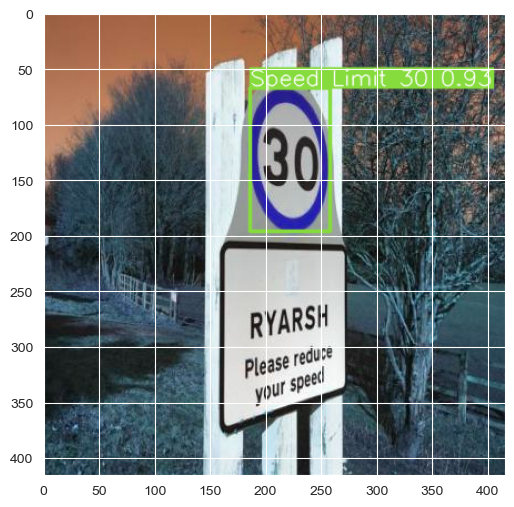


image 1/1 D:\Code\anaconda\code\adverserial_attack\新增資料夾\cmaes_adv_result(0.04).png: 640x640 1 Speed Limit 100, 28.2ms
Speed: 3.0ms preprocess, 28.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detections found in cmaes_adv_result(0.04).png.


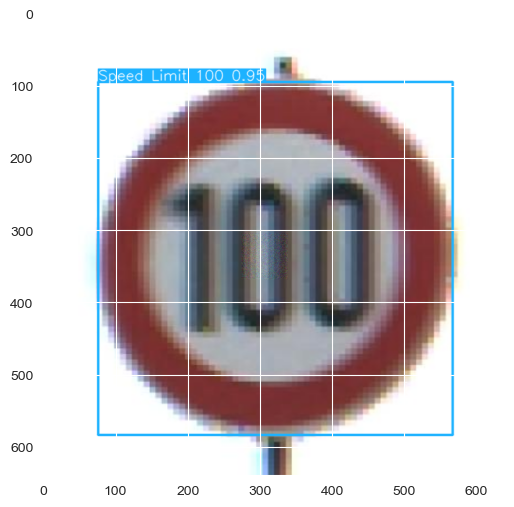


image 1/1 D:\Code\anaconda\code\adverserial_attack\新增資料夾\cmaes_adv_result(0.05).png: 640x640 1 Speed Limit 30, 39.1ms
Speed: 2.0ms preprocess, 39.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detections found in cmaes_adv_result(0.05).png.


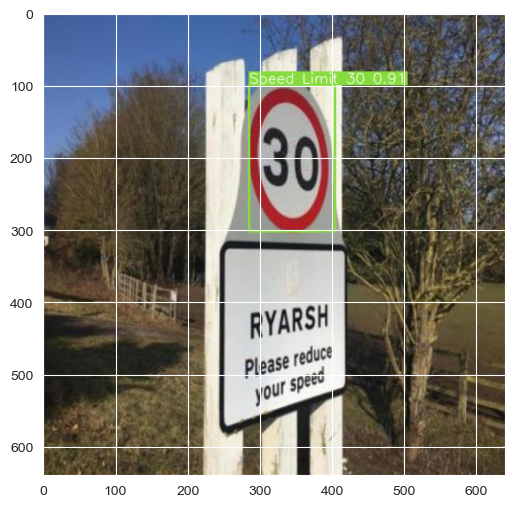


image 1/1 D:\Code\anaconda\code\adverserial_attack\新增資料夾\cmaes_adv_result(0.1).png: 640x640 1 Speed Limit 30, 31.3ms
Speed: 3.0ms preprocess, 31.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detections found in cmaes_adv_result(0.1).png.


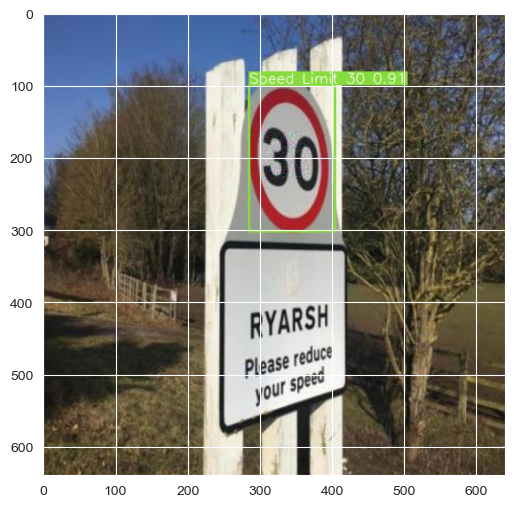


image 1/1 D:\Code\anaconda\code\adverserial_attack\新增資料夾\cmaes_adv_result1.png: 640x640 (no detections), 32.0ms
Speed: 4.5ms preprocess, 32.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
No detections for cmaes_adv_result1.png, showing original image.


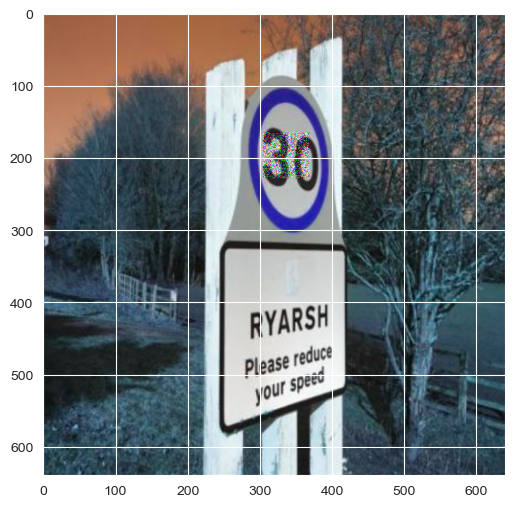


image 1/1 D:\Code\anaconda\code\adverserial_attack\新增資料夾\cmaes_adv_result2.png: 640x640 (no detections), 41.1ms
Speed: 4.5ms preprocess, 41.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
No detections for cmaes_adv_result2.png, showing original image.


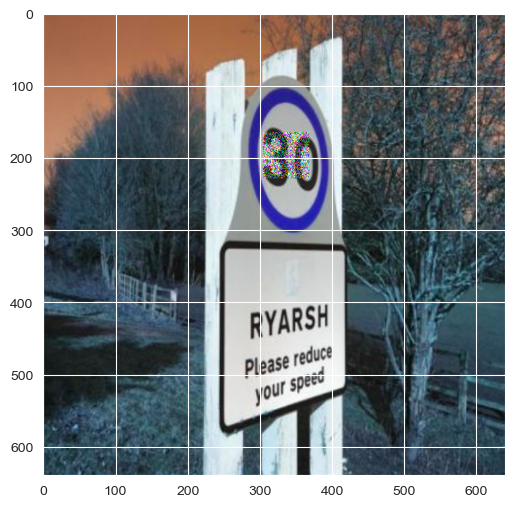

In [13]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 設定圖片資料夾
image_dir = r"D:\Code\anaconda\code\adverserial_attack\新增資料夾"

# 讀取所有圖片
all_images = os.listdir(image_dir)
selected_images = all_images[:45]


# 逐一處理圖片
for img_name in selected_images:
    img_path = os.path.join(image_dir, img_name)

    # 預測圖片
    results = model.predict(img_path)

    # 讀取圖片
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV 讀取的是 BGR 格式，轉換為 RGB

    # 如果 YOLO 有偵測到物件，顯示偵測結果
    if results[0].boxes and len(results[0].boxes) > 0:
        plotted_img = results[0].plot()  # results[0] 是第一張圖片的結果
        print(f"Detections found in {img_name}.")
    else:
        plotted_img = img  # 如果沒有偵測到物件，顯示原圖
        print(f"No detections for {img_name}, showing original image.")

    # 顯示結果圖片
    plt.figure(figsize=(8, 6))
    plt.imshow(plotted_img)
    plt.axis('on')  # 關閉座標軸顯示
    plt.show()


In [ ]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt

# 設定資料夾
input_folder = r'D:\Code\anaconda\code\adverserial_attack\archive\car\test\images'
perturbation_levels = ["0.01", "0.03", "0.05", "0.07"]

# 載入 YOLOv8 模型
model = YOLO(r"D:\Code\anaconda\code\adverserial_attack\runs\detect\train4\weights\best.pt").to('cuda')

def evaluate_model_accuracy(model, image_folder):
    correct = 0
    total = 0
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(image_folder, filename)

            # 使用 YOLO 預測
            results = model.predict(img_path, verbose=False)

            # 有偵測到物件就算成功
            if len(results[0].boxes) > 0:
                correct += 1
            total += 1

    accuracy = correct / total if total > 0 else 0
    return accuracy

# 計算原始準確率
original_accuracy = evaluate_model_accuracy(model, input_folder)
perturbation_accuracies = []

# 計算每個 PGD 擾動強度的準確率
for eps in perturbation_levels:
    adv_folder = f"D:/Code/anaconda/code/adverserial_attack/adv_images(PGD{eps}_resent18)"
    adv_accuracy = evaluate_model_accuracy(model, adv_folder)
    perturbation_accuracies.append(adv_accuracy)
    print(f"PGD 擾動 {eps}: {adv_accuracy:.4f}, 下降: {original_accuracy - adv_accuracy:.4f}")

# 準確率下降圖
accuracy_drop = [original_accuracy - acc for acc in perturbation_accuracies]
plt.figure(figsize=(8, 5))
plt.plot(perturbation_levels, accuracy_drop, marker='o', linestyle='-', color='b', label='Accuracy Drop')
plt.xlabel("擾動大小 (Epsilon)")
plt.ylabel("準確率下降")
plt.title("PGD 攻擊不同擾動強度對 YOLO 的影響")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import cv2
from ultralytics import YOLO

# ========== 載入模型和圖片 ==========
model_path = r"D:\Code\anaconda\code\adverserial_attack\runs\detect\train4\weights\best.pt"
image_path = r"D:\Code\anaconda\code\adverserial_attack\archive\car\train\images\000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg"

model = YOLO(model_path).to('cuda')
model.eval()  # 確保模型在 evaluation 模式

orig_img = cv2.imread(image_path)
orig_img = cv2.resize(orig_img, (640, 640)).astype(np.float32) / 255.0

# ========== YOLO 預測信心值 ==========
def get_yolo_score(img_np):
    x_tensor = torch.tensor(img_np.transpose(2, 0, 1)).float().unsqueeze(0).to('cuda')
    with torch.no_grad():
        results = model(x_tensor)
    boxes = results[0].boxes
    if len(boxes) == 0:
        return 0.0
    return float(boxes.conf.max().item())

# ========== FGSM 攻擊 ==========
def fgsm_attack(image, epsilon):
    model.eval()  # 使用 eval 模式以避免 batchnorm/dropout 擾動
    
    img_tensor = torch.tensor(image.transpose(2, 0, 1)).float().unsqueeze(0).to('cuda')
    img_tensor.requires_grad = True

    out = model(img_tensor)

    if len(out[0].boxes) == 0:
        return image  # 無偵測目標則回傳原圖

    conf = out[0].boxes.conf
    loss = conf.sum()
    loss.backward()

    grad = img_tensor.grad.data
    perturbed = img_tensor + epsilon * grad.sign()
    perturbed = torch.clamp(perturbed, 0, 1)

    return perturbed.squeeze(0).detach().cpu().permute(1, 2, 0).numpy()

# ========== 多 epsilon 測試 ==========
epsilons = np.logspace(-7, -1, num=15)  # 10^-7 ~ 10^-1
scores = []

for eps in epsilons:
    adv_img = fgsm_attack(orig_img, eps)
    score = get_yolo_score(adv_img)
    print(f"Epsilon: {eps:.1e}, Confidence: {score:.4f}")
    scores.append(score)

# ========== 畫圖 ==========
plt.figure(figsize=(8, 5))
plt.plot(epsilons, scores, marker='o', color='red', label='FGSM 攻擊下的信心值')
plt.xscale('log')
plt.xlabel('Epsilon (擾動強度, log scale)')
plt.ylabel('YOLO 模型信心值')
plt.title('FGSM 攻擊下模型適應度（信心值）隨擾動變化')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("fgsm_epsilon_vs_confidence.png")
plt.show()


New https://pypi.org/project/ultralytics/8.3.89 available 😃 Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=D:\Code\anaconda\code\adverserial_attack\runs\detect\train4\weights\best.pt, data=coco8.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=cuda:0, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

d:\anaconda\Lib\site-packages\ultralytics\nn\tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
d:\anaconda\Lib\site-pac

AMP: checks passed ✅


d:\anaconda\Lib\site-packages\ultralytics\engine\trainer.py:276: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning D:\Code\anaconda\code\datasets\coco8\labels\train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
val: Scanning D:\Code\anaconda\code\datasets\coco8\labels\val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to runs\detect\train8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train8
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.36G      1.752       5.71       2.08         21        640: 100%|██████████| 1/1 [00:44<00:00, 44.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.24G      1.679      7.986       1.88         36        640: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.24G      1.313       9.71      1.433         20        640: 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.24G      1.521      10.47      1.789         21        640: 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.24G      1.439      9.827      1.692         19        640: 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.24G      1.432      7.637      1.672         22        640: 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.24G      1.721      8.049      1.859         20        640: 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.25G      1.641      8.646      2.022         20        640: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.31G      1.342       7.96      1.495         20        640: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.32G      1.232      6.093      1.541         25        640: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.32G      1.309      5.562      1.639         31        640: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.32G      1.525      5.813      1.776         31        640: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.32G      1.742      5.645      2.097         24        640: 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.31G      1.047      5.713      1.502         15        640: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.32G      1.641      4.573      1.971         38        640: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.43it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.32G      1.374      4.348      1.595         49        640: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.32G      1.281      4.188      1.602         25        640: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.32G      1.122      4.497      1.189         16        640: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.31G      1.169      4.199      1.344         34        640: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.32G      1.467      4.151      1.518         25        640: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.32G      1.114      4.124      1.468         26        640: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.34G      1.124      3.856      1.256         52        640: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.32G      1.147       4.19      1.564         22        640: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.32G      1.178      3.984      1.466         34        640: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.31G      1.287      4.478      1.617         11        640: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]

                   all          4         17     0.0556     0.0167     0.0306    0.00917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.32G      0.951      3.756      1.256         35        640: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.09it/s]

                   all          4         17     0.0556     0.0167     0.0306    0.00917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.32G       1.02      3.668      1.341         24        640: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]

                   all          4         17     0.0417     0.0167     0.0242    0.00727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.32G      1.029      3.715      1.309         35        640: 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]

                   all          4         17     0.0417     0.0167     0.0242    0.00727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.32G      1.066      3.981      1.335         28        640: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all          4         17     0.0333     0.0167     0.0204    0.00613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.32G     0.9939       3.68      1.344         29        640: 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]

                   all          4         17     0.0333     0.0167     0.0204    0.00613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.32G      1.243      3.872      1.633         25        640: 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]


                   all          4         17     0.0476     0.0333     0.0323     0.0139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.32G     0.9156      3.465      1.536         20        640: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.38it/s]

                   all          4         17     0.0476     0.0333     0.0323     0.0139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.32G      1.151       3.75      1.486         31        640: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all          4         17     0.0625       0.05     0.0468     0.0208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.32G       1.09      3.244      1.434         32        640: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]

                   all          4         17     0.0625       0.05     0.0468     0.0208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.32G      1.019      3.369      1.434         23        640: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all          4         17     0.0625       0.05     0.0433     0.0183


In [ ]:
def evaluate_model_accuracy(model, image_folder):
    correct = 0
    total = 0
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(image_folder, filename)
            image = Image.open(img_path).convert("RGB")
            input_tensor = transform(image).unsqueeze(0).cuda()

            # YOLO 進行預測
            results = model(input_tensor)
            
            # 假設你有標註的 ground truth（這裡只是概念，實際上應該與標註做比對）
            if len(results) > 0:
                correct += 1  # 如果 YOLO 有偵測到物件，就計為正確
            total += 1

    accuracy = correct / total
    return accuracy

original_accuracy = evaluate_model_accuracy(model, input_folder)
fgsm_accuracy = evaluate_model_accuracy(model, "D:/Code/anaconda/code/adverserial_attack/adv_images(FGSM)0.01")
pgd_accuracy = evaluate_model_accuracy(model, "D:/Code/anaconda/code/adverserial_attack/adv_images(PGD)0.03")

print(f"原始準確率: {original_accuracy:.4f}")
print(f"FGSM 準確率: {fgsm_accuracy:.4f}, 下降: {original_accuracy - fgsm_accuracy:.4f}")
print(f"PGD 準確率: {pgd_accuracy:.4f}, 下降: {original_accuracy - pgd_accuracy:.4f}")


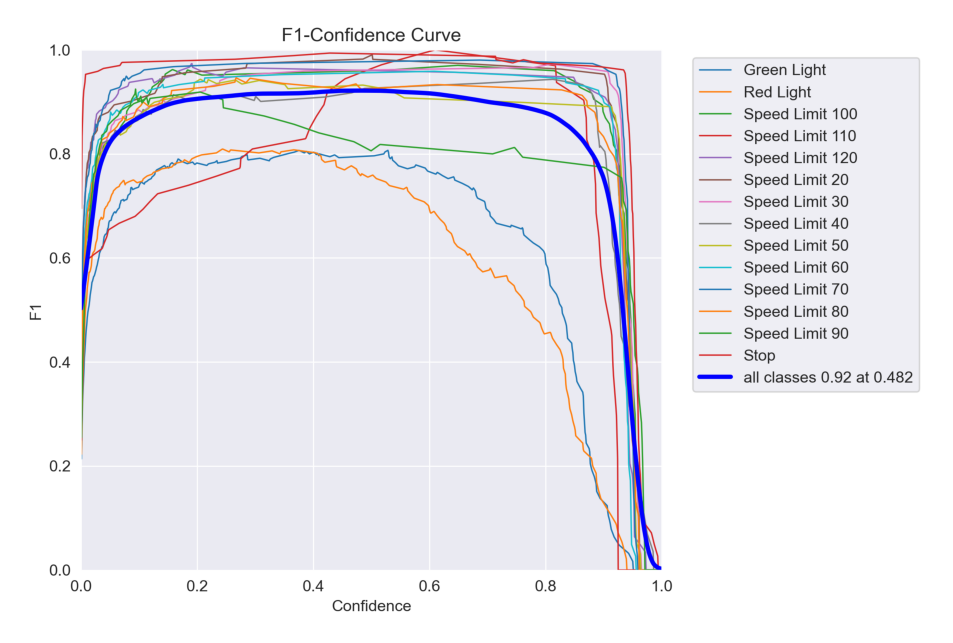

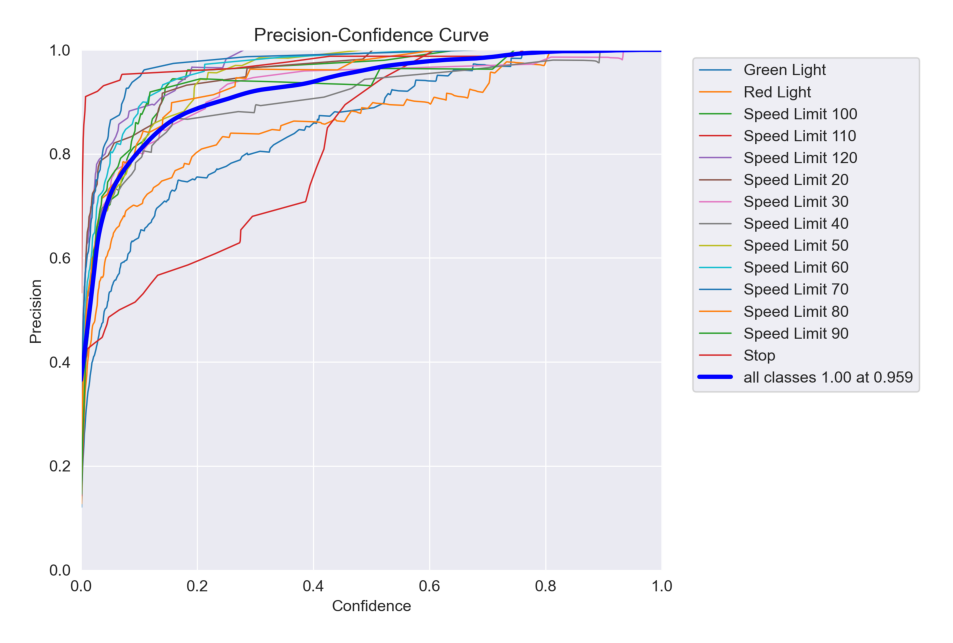

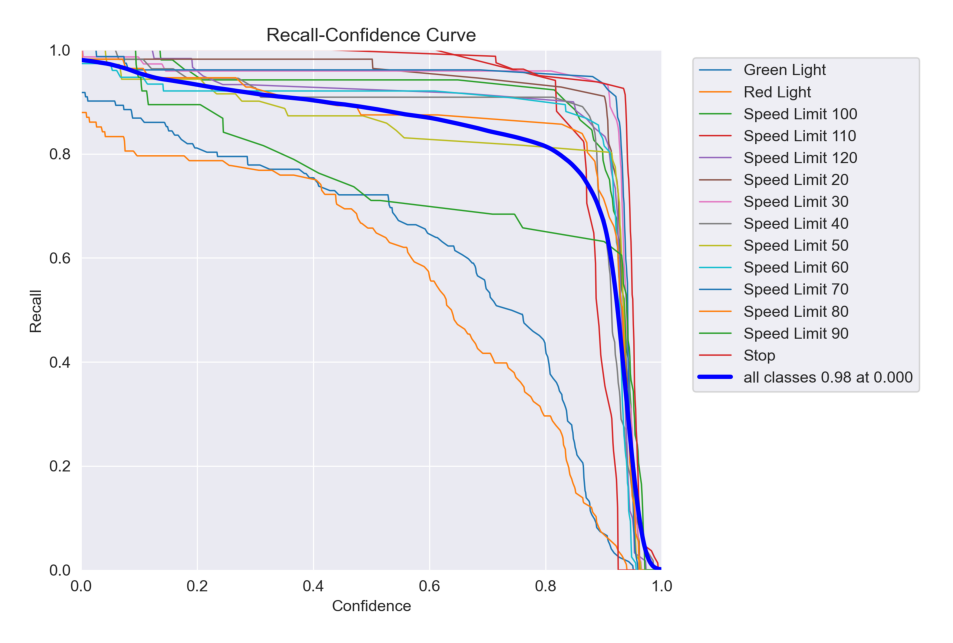

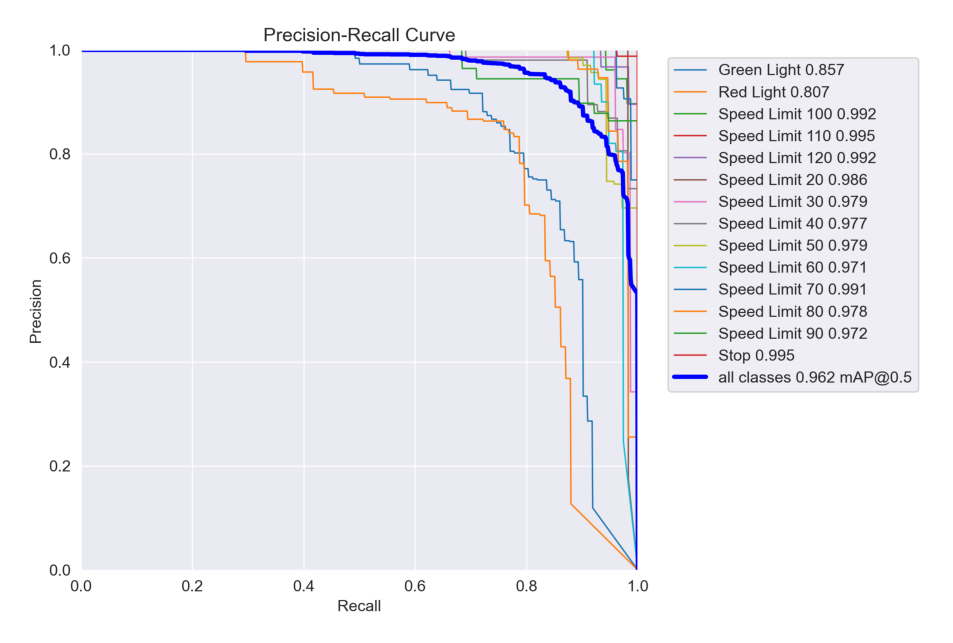

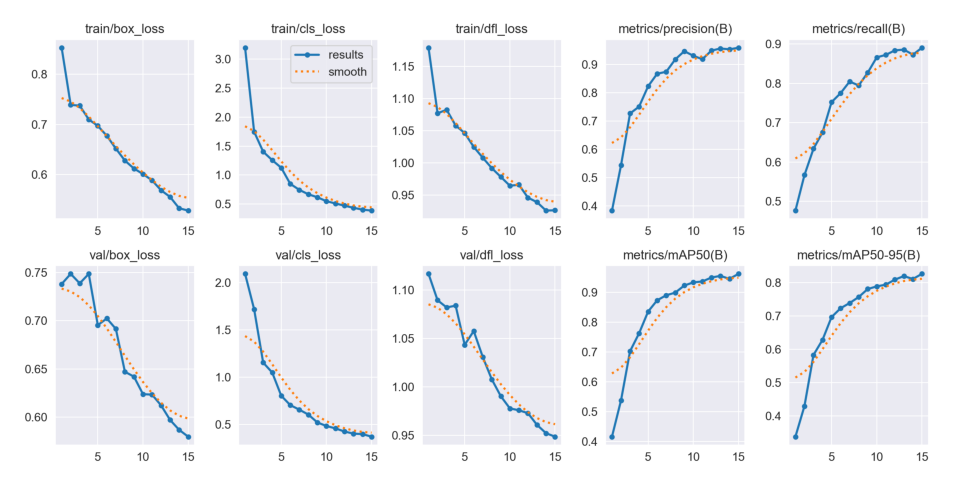

In [12]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):
    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# 定義絕對路徑
post_training_files_path = r"D:\Code\anaconda\code\adverserial_attack\runs\detect\train"

image_files = [
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

display_images(post_training_files_path, image_files)


Epsilon	FGSM_Conf	Attack	PGD_Conf	Attack

0: 640x640 1 Speed Limit 100, 10.1ms
Speed: 10.0ms preprocess, 10.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 100, 75.1ms
Speed: 10.0ms preprocess, 75.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
0.000	0.0000		✔️	0.0000		✔️

0: 640x640 1 Speed Limit 100, 25.1ms
Speed: 0.0ms preprocess, 25.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 100, 116.4ms
Speed: 0.0ms preprocess, 116.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
0.005	0.0000		✔️	0.0000		✔️

0: 640x640 1 Speed Limit 100, 104.0ms
Speed: 6.3ms preprocess, 104.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 100, 106.8ms
Speed: 0.0ms preprocess, 106.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
0.010	0.0000		✔️	0.0000		✔️

0: 640x640 1 Speed Limit 100, 56.8ms
Speed: 10.0ms prepr

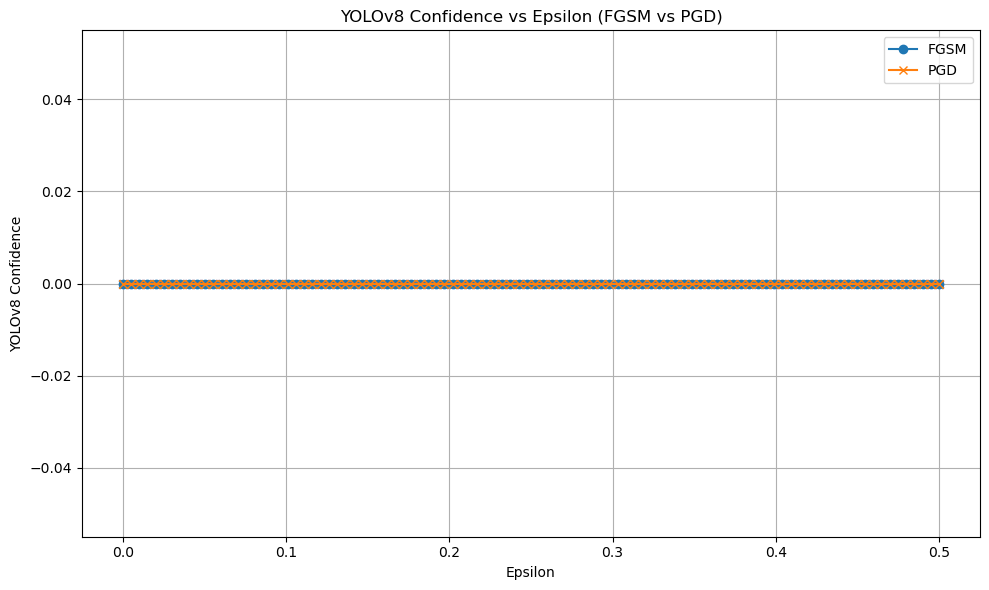

In [ ]:
# 主攻擊流程
def run_attacks(image_path):
    make_dirs()
    clean_tensor, original_pil = load_image(image_path)

    with torch.no_grad():
        output = resnet(clean_tensor)
        label = output.argmax(dim=1)

    epsilons = np.linspace(0.000, 0.5, 100)  # ✅ 改成 100 個點
    fgsm_conf_list = []
    pgd_conf_list = []

    print("Epsilon\tFGSM_Conf\tPGD_Conf")
    for eps in epsilons:
        # FGSM
        fgsm_img = fgsm_attack(clean_tensor.clone(), eps, label, resnet)
        fgsm_pil = transforms.ToPILImage()(fgsm_img.squeeze())
        fgsm_conf = get_yolo_confidence(yolo, fgsm_pil)
        fgsm_conf_list.append(fgsm_conf)
        save_image(fgsm_img, f"adv_images/fgsm/eps_{eps:.3f}.png")

        # PGD
        pgd_img = pgd_attack(clean_tensor.clone(), label, resnet, eps)
        pgd_pil = transforms.ToPILImage()(pgd_img.squeeze())
        pgd_conf = get_yolo_confidence(yolo, pgd_pil)
        pgd_conf_list.append(pgd_conf)
        save_image(pgd_img, f"adv_images/pgd/eps_{eps:.3f}.png")

        # 印出結果
        print(f"{eps:.3f}\t{fgsm_conf:.4f}\t\t{pgd_conf:.4f}")

    # 畫圖
    plt.figure(figsize=(10, 6))
    plt.plot(epsilons, fgsm_conf_list, label="FGSM", marker="o", markersize=3)
    plt.plot(epsilons, pgd_conf_list, label="PGD", marker="x", markersize=3)
    plt.title("YOLOv8 Confidence vs Epsilon (FGSM vs PGD)")
    plt.xlabel("Epsilon")
    plt.ylabel("YOLOv8 Confidence")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("adv_images/confidence_plot.png")
    plt.show()


In [10]:
import torch
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
import os
import csv

class AdversarialAttackYOLO:
    def __init__(self, yolo_weights_path, device=None):
        self.device = device or ('cuda' if torch.cuda.is_available() else 'cpu')
        self.YOLO_CLASSES = ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110',
                            'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50',
                            'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']

        self.resnet = models.resnet18(pretrained=True).to(self.device).eval()
        self.yolo = YOLO(yolo_weights_path)
        self.preprocess = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ])

    def load_image(self, image_path):
        img = Image.open(image_path).convert('RGB')
        tensor = self.preprocess(img).unsqueeze(0).to(self.device)
        return tensor, img

    def save_image(self, tensor, save_path):
        img = transforms.ToPILImage()(tensor.squeeze().cpu())
        img.save(save_path)

    def class_to_idx(self, cls_name):
        if cls_name in self.YOLO_CLASSES:
            return self.YOLO_CLASSES.index(cls_name)
        return -1  # None 類別

    def get_yolo_conf_and_class(self, image_pil):
        with torch.no_grad():
            results = self.yolo(image_pil)
        boxes = results[0].boxes
        if len(boxes) > 0:
            confs = [box.conf.item() for box in boxes]
            classes = [int(box.cls.item()) for box in boxes]
            avg_conf = np.mean(confs)
            main_class = self.YOLO_CLASSES[classes[0]]
            return avg_conf, main_class
        else:
            return 0.0, "None"

    def fgsm_attack(self, image, epsilon, label, noise_scale=0.0):
        image = image.clone().detach().requires_grad_(True)
        output = self.resnet(image)
        loss = F.nll_loss(F.log_softmax(output, dim=1), label)
        self.resnet.zero_grad()
        loss.backward()
        data_grad = image.grad.data
        perturbed = image + epsilon * data_grad.sign()
        if noise_scale > 0:
            noise = torch.empty_like(perturbed).normal_(mean=0, std=noise_scale)
            perturbed = perturbed + noise
        return torch.clamp(perturbed, 0, 1)

    def pgd_attack(self, image, label, epsilon, alpha=0.01, iters=40, noise_scale=0.0):
        ori_image = image.clone().detach()
        perturbed = ori_image + torch.empty_like(ori_image).uniform_(-epsilon, epsilon)
        perturbed = torch.clamp(perturbed, 0, 1)
        for _ in range(iters):
            perturbed = perturbed.clone().detach().requires_grad_(True)
            output = self.resnet(perturbed)
            loss = F.nll_loss(F.log_softmax(output, dim=1), label)
            self.resnet.zero_grad()
            loss.backward()
            grad = perturbed.grad.data
            perturbed = perturbed + alpha * grad.sign()
            perturbed = torch.max(torch.min(perturbed, ori_image + epsilon), ori_image - epsilon)
            perturbed = torch.clamp(perturbed, 0, 1).detach()
            if noise_scale > 0:
                noise = torch.empty_like(perturbed).normal_(mean=0, std=noise_scale)
                perturbed = perturbed + noise
        return torch.clamp(perturbed, 0, 1)

    def bim_attack(self, image, label, epsilon, alpha=0.01, iters=10, noise_scale=0.0):
        ori_image = image.clone().detach()
        adv = ori_image + torch.empty_like(ori_image).uniform_(-epsilon, epsilon)
        adv = torch.clamp(adv, 0, 1).detach()
        
        for i in range(iters):
            adv = adv.clone().detach().requires_grad_(True)
            output = self.resnet(adv)
            loss = F.nll_loss(F.log_softmax(output, dim=1), label)
            self.resnet.zero_grad()
            loss.backward()
            grad = adv.grad.data
            adv = adv + alpha * grad.sign()
            if noise_scale > 0:
                noise = torch.empty_like(adv).normal_(mean=0, std=noise_scale * i)
                adv = adv + noise
            adv = torch.max(torch.min(adv, ori_image + epsilon), ori_image - epsilon)
            adv = torch.clamp(adv, 0, 1).detach()
        return adv

    def run_attacks(self, image_path):
        epsilons = np.arange(0.0, 0.5 + 0.002, 0.002)  # 251 steps, step=0.002

        base_dir = "adv_images"
        fgsm_dir = os.path.join(base_dir, "fgsm_noise")
        pgd_dir = os.path.join(base_dir, "pgd_noise")
        bim_dir = os.path.join(base_dir, "bim_noise")
        os.makedirs(fgsm_dir, exist_ok=True)
        os.makedirs(pgd_dir, exist_ok=True)
        os.makedirs(bim_dir, exist_ok=True)

        clean_tensor, original_pil = self.load_image(image_path)
        with torch.no_grad():
            output = self.resnet(clean_tensor)
            label = output.argmax(dim=1)

        csv_path = os.path.join(base_dir, "attack_results_with_noise.csv")
        with open(csv_path, mode='w', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(["Epsilon", 
                             "FGSM_Conf", "FGSM_Class", "FGSM_L2", 
                             "PGD_Conf", "PGD_Class", "PGD_L2", 
                             "BIM_Conf", "BIM_Class", "BIM_L2"])

            for i, eps in enumerate(epsilons):
                noise_std = i * 0.002  # 動態噪聲標準差

                fgsm_img = self.fgsm_attack(clean_tensor, eps, label, noise_scale=noise_std)
                fgsm_pil = transforms.ToPILImage()(fgsm_img.squeeze())
                fgsm_conf, fgsm_cls = self.get_yolo_conf_and_class(fgsm_pil)
                fgsm_l2 = torch.norm((fgsm_img - clean_tensor).view(1, -1)).item()
                fgsm_save_path = os.path.join(fgsm_dir, f"eps_{eps:.3f}_noise_{noise_std:.3f}.png")
                self.save_image(fgsm_img, fgsm_save_path)

                pgd_img = self.pgd_attack(clean_tensor, label, eps, noise_scale=noise_std)
                pgd_pil = transforms.ToPILImage()(pgd_img.squeeze())
                pgd_conf, pgd_cls = self.get_yolo_conf_and_class(pgd_pil)
                pgd_l2 = torch.norm((pgd_img - clean_tensor).view(1, -1)).item()
                pgd_save_path = os.path.join(pgd_dir, f"eps_{eps:.3f}_noise_{noise_std:.3f}.png")
                self.save_image(pgd_img, pgd_save_path)

                bim_img = self.bim_attack(clean_tensor, label, eps, noise_scale=noise_std)
                bim_pil = transforms.ToPILImage()(bim_img.squeeze())
                bim_conf, bim_cls = self.get_yolo_conf_and_class(bim_pil)
                bim_l2 = torch.norm((bim_img - clean_tensor).view(1, -1)).item()
                bim_save_path = os.path.join(bim_dir, f"eps_{eps:.3f}_noise_{noise_std:.3f}.png")
                self.save_image(bim_img, bim_save_path)

                writer.writerow([f"{eps:.4f}",
                                 f"{fgsm_conf:.4f}", fgsm_cls, f"{fgsm_l2:.4f}",
                                 f"{pgd_conf:.4f}", pgd_cls, f"{pgd_l2:.4f}",
                                 f"{bim_conf:.4f}", bim_cls, f"{bim_l2:.4f}"])

                print(f"Epsilon {eps:.3f} noise_std {noise_std:.3f} - FGSM: {fgsm_conf:.4f}, PGD: {pgd_conf:.4f}, BIM: {bim_conf:.4f}")


if __name__ == "__main__":
    attack_obj = AdversarialAttackYOLO(
        r"D:\Code\anaconda\code\adverserial_attack\runs\detect(yolov8)\train\weights\best.pt")
    attack_obj.run_attacks(
        r"D:\Code\cybersecurity\AIS3 2025 project new\00007_00002_00023_png.rf.be3229e4dac05e06e9727e01f7761c4f.jpg")


d:\anaconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
d:\anaconda\Lib\site-packages\ultralytics\nn\tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more de


0: 640x640 1 Speed Limit 100, 21.0ms
Speed: 6.5ms preprocess, 21.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 100, 12.4ms
Speed: 3.1ms preprocess, 12.4ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 100, 19.1ms
Speed: 8.0ms preprocess, 19.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Epsilon 0.000 noise_std 0.000 - FGSM: 0.9535, PGD: 0.9535, BIM: 0.9535

0: 640x640 1 Speed Limit 100, 22.3ms
Speed: 7.0ms preprocess, 22.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 100, 10.1ms
Speed: 0.0ms preprocess, 10.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 100, 12.9ms
Speed: 2.0ms preprocess, 12.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Epsilon 0.002 noise_std 0.002 - FGSM: 0.9534, PGD: 0.9537, BIM: 0.9533

0: 640x640 1 Speed Limit 100, 12.9ms
Speed: 6.5

In [4]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# === 模型載入 ===
classifier = torch.load(r'D:\Code\anaconda\code\adverserial_attack\runs\detect(yolov8)\train\weights\best.pt', map_location=device)
classifier.eval()

# === 攻擊參數 ===
EPSILON = 0.03
ALPHA = 0.005
STEPS = int(EPSILON / ALPHA)

# === 載入圖片 ===
img_path = "example.jpg"  # ← 替換為你要測試的圖片
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
image = Image.open(img_path).convert("RGB")
original_img = transform(image).unsqueeze(0).to(device)

# === 原始分類與信心 ===
with torch.no_grad():
    logits = classifier(original_img)
    pred_class = logits.argmax(dim=1).item()
    pred_confidence = F.softmax(logits, dim=1).max().item()

# === 建立輸出資料夾 ===
os.makedirs("attack_visuals", exist_ok=True)

# === FGSM 攻擊 ===
def fgsm_attack(img, label, epsilon):
    img.requires_grad = True
    output = classifier(img)
    loss = F.cross_entropy(output, label)
    classifier.zero_grad()
    loss.backward()
    perturbed = img + epsilon * img.grad.sign()
    return torch.clamp(perturbed, 0, 1)

# === PGD 攻擊 ===
def pgd_attack(img, label, epsilon, alpha=0.005, steps=6):
    ori = img.clone().detach()
    perturbed = ori + torch.empty_like(ori).uniform_(-epsilon, epsilon)
    perturbed = torch.clamp(perturbed, 0, 1)
    for _ in range(steps):
        perturbed.requires_grad = True
        output = classifier(perturbed)
        loss = F.cross_entropy(output, label)
        classifier.zero_grad()
        loss.backward()
        perturbed = perturbed + alpha * perturbed.grad.sign()
        perturbed = torch.max(torch.min(perturbed, ori + epsilon), ori - epsilon)
        perturbed = torch.clamp(perturbed, 0, 1).detach()
    return perturbed

# === BIM 攻擊 ===
def bim_attack(img, label, epsilon, alpha, steps):
    ori = img.clone().detach()
    adv = ori.clone().detach()
    for _ in range(steps):
        adv.requires_grad = True
        output = classifier(adv)
        loss = F.cross_entropy(output, label)
        classifier.zero_grad()
        loss.backward()
        adv = adv + alpha * adv.grad.sign()
        adv = torch.min(torch.max(adv, ori - epsilon), ori + epsilon)
        adv = torch.clamp(adv, 0, 1).detach()
    return adv

# === 可視化並儲存圖片 ===
def save_image(tensor_img, path):
    img = tensor_img.squeeze().detach().cpu().numpy().transpose(1, 2, 0)
    img = (img * 255).clip(0, 255).astype(np.uint8)
    Image.fromarray(img).save(path)

# === 攻擊實驗 ===
def run_attack(attack_name):
    l2_list, conf_list, cls_list = [], [], []
    label = torch.tensor([pred_class], device=device)

    out_dir = os.path.join("attack_visuals", attack_name)
    os.makedirs(out_dir, exist_ok=True)

    for step in range(1, STEPS + 1):
        eps = step * ALPHA

        if attack_name == 'FGSM':
            adv = fgsm_attack(original_img.clone(), label, eps)
        elif attack_name == 'PGD':
            adv = pgd_attack(original_img.clone(), label, eps, alpha=ALPHA, steps=step)
        elif attack_name == 'BIM':
            adv = bim_attack(original_img.clone(), label, epsilon=eps, alpha=ALPHA, steps=step)

        # === 儲存圖片 ===
        save_path = os.path.join(out_dir, f"step_{step:03d}.png")
        save_image(adv, save_path)

        # === 評估 ===
        with torch.no_grad():
            output = classifier(adv)
            conf = F.softmax(output, dim=1).max().item()
            pred = output.argmax(dim=1).item()
        l2 = torch.norm((adv - original_img).view(1, -1)).item()

        l2_list.append(l2)
        conf_list.append(conf)
        cls_list.append(pred)

    return l2_list, conf_list, cls_list

# === 執行三種攻擊 ===
attacks = ['FGSM', 'PGD', 'BIM']
results = {}

for atk in attacks:
    print(f"Running {atk}...")
    results[atk] = run_attack(atk)

steps = list(range(1, STEPS + 1))

# === 📊 畫圖 ===
plt.figure(figsize=(18, 5))

# 1️⃣ L2 Distance
plt.subplot(1, 3, 1)
for atk in attacks:
    plt.plot(steps, results[atk][0], label=atk)
plt.title("L2 Distance vs Step")
plt.xlabel("Step")
plt.ylabel("L2 Distance")
plt.grid(True)
plt.legend()

# 2️⃣ Confidence
plt.subplot(1, 3, 2)
for atk in attacks:
    plt.plot(steps, results[atk][1], label=atk)
plt.title("Confidence vs Step")
plt.xlabel("Step")
plt.ylabel("Softmax Max Confidence")
plt.grid(True)
plt.legend()

# 3️⃣ Class Change
plt.subplot(1, 3, 3)
for atk in attacks:
    colors = ['red' if cls != pred_class else 'blue' for cls in results[atk][2]]
    plt.scatter(steps, results[atk][2], label=atk, c=colors, alpha=0.6)
plt.title("Predicted Class vs Step")
plt.xlabel("Step")
plt.ylabel("Predicted Class")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig("attack_comparison.png")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_5004\2976978692.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  classifier = torch.load(r'D:\Code\anaconda\code\adverserial_a

AttributeError: 'dict' object has no attribute 'eval'

In [12]:
import os

def modify_labels(folder_path, old_label=3, new_label=2):
    # 遍歷資料夾中的所有檔案
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)

            with open(file_path, 'r') as f:
                lines = f.readlines()

            new_lines = []
            for line in lines:
                parts = line.strip().split()
                if len(parts) >= 5 and parts[0] == str(old_label):
                    parts[0] = str(new_label)
                new_lines.append(' '.join(parts) + '\n')

            # 寫回檔案
            with open(file_path, 'w') as f:
                f.writelines(new_lines)

    print("Label 修改完成！")

# 使用範例
folder_path = r"D:\Code\anaconda\code\traffic sign\traffic sign.v1i.yolov8\train\labels"  # ← 把這裡改成你的資料夾路徑
modify_labels(folder_path)


Label 修改完成！


# blackattack(CMA-ES)

In [ ]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cma

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 支援中文

# ======================== 基本參數 ========================
image_path = r"D:\Code\anaconda\code\adverserial_attack\archive\car\train\images\00007_00002_00023_png.rf.be3229e4dac05e06e9727e01f7761c4f.jpg"
model_path = r"D:\Code\anaconda\code\adverserial_attack\runs\detect\train\weights\best.pt"

patch_size = 64
max_iter = 700
epsilon = 0.07
popsize = 20
target_cls = None           # 可設目標類別，或設為 None
early_stop_threshold = 0.2  # 信心值門檻，低於此值提前停止

# ======================== 載入模型與圖片 ========================
yolo_model = YOLO(model_path).to('cuda')
orig_img = cv2.imread(image_path)
orig_img = cv2.resize(orig_img, (640, 640)).astype(np.float32) / 255.0

def get_yolo_score(img_np):
    x_tensor = torch.tensor(img_np.transpose(2, 0, 1)).float().unsqueeze(0).to('cuda')
    with torch.no_grad():
        results = yolo_model(x_tensor)
    boxes = results[0].boxes
    if len(boxes) == 0:
        return 0.0
    if target_cls is not None:
        boxes = boxes[boxes.cls == target_cls]
        if len(boxes) == 0:
            return 0.0
    return float(boxes.conf.max().item())

original_score = get_yolo_score(orig_img)
print(f"原始圖片信心值: {original_score:.4f}")

# ======================== CMA-ES 攻擊主函數 ========================
def cmaes_patch_attack(image, yolo_model, patch_size=64, max_iter=100, epsilon=0.7, target_cls=None, popsize=20, stop_score=0.2):
    h, w, _ = image.shape
    img = image.copy()

    # ==== 取得初始框位置 ====
    x_tensor = torch.tensor(img.transpose(2, 0, 1)).float().unsqueeze(0).to('cuda')
    with torch.no_grad():
        results = yolo_model(x_tensor)
    boxes = results[0].boxes

    if len(boxes) == 0:
        print("⚠️ 未偵測到任何框，隨機放置 patch")
        top = np.random.randint(0, h - patch_size)
        left = np.random.randint(0, w - patch_size)
    else:
        target_boxes = boxes[boxes.cls == target_cls] if target_cls is not None else boxes
        if len(target_boxes) == 0:
            target_boxes = boxes
        box = target_boxes[torch.argmax(target_boxes.conf)]
        x1, y1, x2, y2 = box.xyxy[0].int().tolist()
        cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
        top = max(0, min(h - patch_size, cy - patch_size // 2))
        left = max(0, min(w - patch_size, cx - patch_size // 2))

    init_patch = np.zeros((patch_size * patch_size * 3), dtype=np.float32)
    confidence_history = []

    def evaluate(patch_flat):
        patch = patch_flat.reshape((patch_size, patch_size, 3))
        patch = np.clip(patch, -epsilon, epsilon)

        adv_img = img.copy()
        adv_img[top:top+patch_size, left:left+patch_size] += patch
        adv_img = np.clip(adv_img, 0, 1)

        score = get_yolo_score(adv_img)
        return score

    es = cma.CMAEvolutionStrategy(init_patch, 0.3, {'maxiter': max_iter, 'popsize': popsize})
    while not es.stop():
        solutions = es.ask()
        scores = [evaluate(np.array(x)) for x in solutions]
        es.tell(solutions, scores)

        best_score = min(scores)
        confidence_history.append(best_score)
        print(f"[Iteration {len(confidence_history)}] 最佳信心值: {best_score:.4f}")

        if best_score < stop_score:
            print(f"✅ 提前停止，信心值低於 {stop_score}")
            break

        es.disp()

    best_patch = es.best.x.reshape((patch_size, patch_size, 3))
    best_patch = np.clip(best_patch, -epsilon, epsilon)

    adv_img = img.copy()
    adv_img[top:top+patch_size, left:left+patch_size] += best_patch
    adv_img = np.clip(adv_img, 0, 1)

    return adv_img, (top, left, patch_size), best_patch, confidence_history

# ========== 執行攻擊 ==========
adv_img, (t, l, s), best_patch, confidence_history = cmaes_patch_attack(
    orig_img, yolo_model=yolo_model,
    patch_size=patch_size,
    max_iter=max_iter,
    epsilon=epsilon,
    target_cls=target_cls,
    popsize=popsize,
    stop_score=early_stop_threshold
)

adv_score = get_yolo_score(adv_img)
print(f"最終對抗圖片信心值: {adv_score:.4f}")

# ========== 顯示圖片 ==========
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(orig_img)
plt.title(f"原始圖\n信心值: {original_score:.3f}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adv_img)
plt.title(f"CMA-ES 對抗圖\n信心值: {adv_score:.3f}")
plt.axis('off')
plt.tight_layout()
plt.show()

# ========== 儲存圖片 ==========
adv_img_uint8 = (adv_img * 255).astype(np.uint8)
cv2.imwrite("cmaes_adv_result1.png", cv2.cvtColor(adv_img_uint8, cv2.COLOR_RGB2BGR))

# Patch 圖
patch_img = (best_patch + epsilon) / (2 * epsilon)  # Normalize to [0, 1]
cv2.imwrite("patch.png", (patch_img * 255).astype(np.uint8))

# 差異圖
diff_img = np.abs(orig_img - adv_img)
cv2.imwrite("diff.png", (diff_img * 255).astype(np.uint8))

# ========== 畫出信心值下降歷程 ==========
plt.figure(figsize=(8, 4))
plt.plot(confidence_history, label="YOLO 信心值")
plt.xlabel("Iteration")
plt.ylabel("Confidence")
plt.title("CMA-ES 攻擊過程中的信心值變化")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("score_plot.png")
plt.show()


d:\anaconda\Lib\site-packages\ultralytics\nn\tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")



0: 640x640 1 Speed Limit 100, 17.0ms
Speed: 1.0ms preprocess, 17.0ms inference, 52.6ms postprocess per image at shape (1, 3, 640, 640)
原始圖片信心值: 0.9494

0: 640x640 1 Speed Limit 100, 19.0ms
Speed: 0.0ms preprocess, 19.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 12288 (seed=929719, Wed Mar 12 22:47:25 2025)

0: 640x640 1 Speed Limit 100, 18.0ms
Speed: 0.0ms preprocess, 18.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 100, 19.5ms
Speed: 0.0ms preprocess, 19.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 100, 19.0ms
Speed: 0.0ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 100, 20.0ms
Speed: 0.0ms preprocess, 20.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 100, 19.5ms
Speed: 0.0ms preprocess, 19.5ms inferen